In [1]:
# A notebook for simple lstm exploration
# Case of single lstm cell
from peratouch.data import Data, test_accuracy
from peratouch.trainer import Trainer, plot_train
from peratouch.networks import lstm
from peratouch.config import datapath_five_users

input_size = 4 
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99878953]
[0.9981559]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Shape of test set: (4663, 8, 4) 
Shape of train set: (21763, 8, 4) 
Shape of validation set: (4664, 8, 4) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.24, 0.2, 0.2, 0.18, 0.18] 
Fraction of train labels:  [0.24, 0.19, 0.2, 0.18, 0.19] 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.593, loss_val=1.591, train=24.4%, val=24.9%
End of epoch 3:loss_tr=1.290, loss_val=1.293, train=45.0%, val=45.5%
End of epoch 5:loss_tr=1.160, loss_val=1.159, train=52.0%, val=52.1%
End of epoch 7:loss_tr=1.132, loss_val=1.133, train=52.9%, val=52.5%
End of epoch 9:loss_tr=1.110, loss_val=1.113, train=53.7%, val=53.5%
End of epoch 11:loss_tr=1.094, loss_val=1.099, train=54.5%, val=54.6%
End of epoch 13:loss_tr=1.062, loss_val=1.061, train=56.4%, val=56.2%
End of epoch 15:loss_tr=1.045, loss_val=1.046, train=56.0%, val=55.3%
End of epoch 17:loss_tr=1.042, loss_val=1.040, train=57.4%, val=57.7%
End of epoch 19:loss_tr=1.016, loss_val=1.025, train=58.0%, val=57.0%
End of epoch 21:loss_tr=1.076, loss_val=1.081, train=55.3%, val=55.3%
End of epoch 23:loss_tr=1.030, loss_val=1.032, train=57.0%, val=56.7%
End of epoch 25:loss_tr=0.991, loss_val=0.993, train=59.5%, val=59.0%
End of epoch 27:loss_tr=0.999, loss_val=1.005, train=58.9%, val=58.7%
End of epoch 29:loss_tr=0

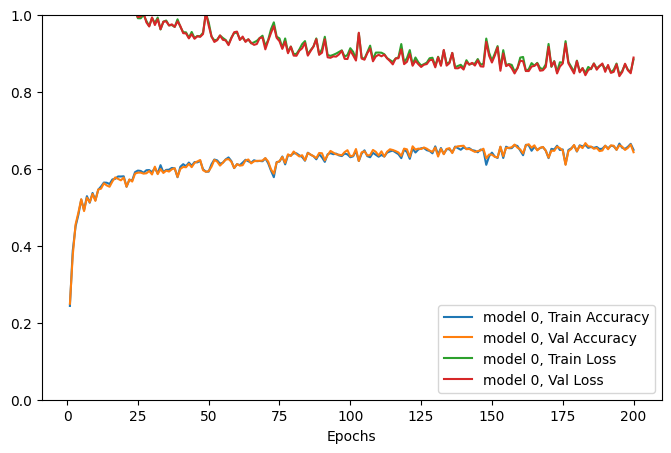

In [2]:
model = lstm(input_size=input_size, hidden_size=16, out_size=5, global_pool=True) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=100, verbose=True)
T.train_model(model)

plot_train([T])
test_accuracy([D], [model])

In [1]:
# Look at 3 triggers
from peratouch.data import Data, test_accuracy
from peratouch.trainer import Trainer, plot_train
from peratouch.networks import lstm
from peratouch.config import datapath_five_users

input_size = 32 
D = Data(datapath_five_users, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.reshape_for_lstm(input_size=input_size, sliding=False)
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1. 1. 1.]
[1.00057317 0.99995641 0.99929076]
[1.00192988 1.00256451 1.00235689]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31075, 3, 32) 
Labels shape:  (31075,) 
Shape of test set: (4661, 3, 32) 
Shape of train set: (21752, 3, 32) 
Shape of validation set: (4662, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.25, 0.2, 0.2, 0.17, 0.18] 
Fraction of train labels:  [0.24, 0.19, 0.2, 0.18, 0.19] 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=1.588, loss_val=1.588, train=22.5%, val=22.5%
End of epoch 3:loss_tr=1.493, loss_val=1.496, train=36.9%, val=36.0%
End of epoch 5:loss_tr=1.345, loss_val=1.350, train=44.6%, val=44.3%
End of epoch 7:loss_tr=1.306, loss_val=1.312, train=41.0%, val=40.9%
End of epoch 9:loss_tr=1.238, loss_val=1.248, train=46.4%, val=46.1%
End of epoch 11:loss_tr=1.183, loss_val=1.193, train=48.7%, val=49.0%
End of epoch 13:loss_tr=1.149, loss_val=1.164, train=50.8%, val=49.9%
End of epoch 15:loss_tr=1.138, loss_val=1.153, train=50.4%, val=50.7%
End of epoch 17:loss_tr=1.132, loss_val=1.144, train=49.3%, val=49.1%
End of epoch 19:loss_tr=1.098, loss_val=1.113, train=53.1%, val=52.9%
End of epoch 21:loss_tr=1.070, loss_val=1.086, train=54.4%, val=54.0%
End of epoch 23:loss_tr=1.072, loss_val=1.087, train=52.8%, val=52.6%
End of epoch 25:loss_tr=1.090, loss_val=1.107, train=51.9%, val=51.6%
End of epoch 27:loss_tr=1.076, loss_val=1.094, train=54.5%, val=54.0%
End of epoch 29:loss_tr=1

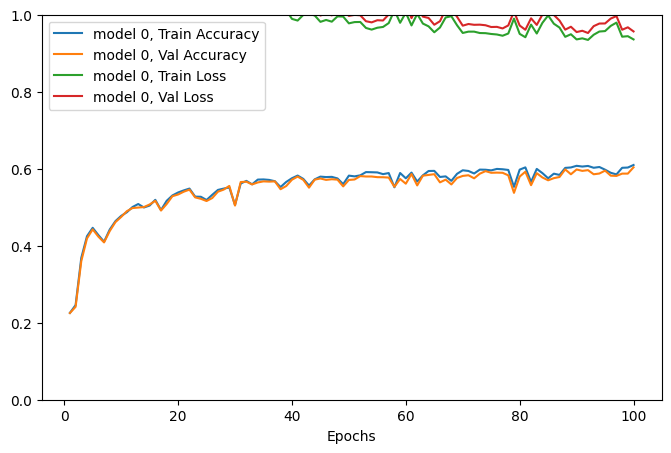

In [2]:
model = lstm(input_size=input_size, hidden_size=int(input_size/2), out_size=5, dropout=0) 
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5000, max_epochs=100)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])